### Load Google Drive Datasets into Google Colab

### Check dataset in directory

In [ ]:
source_path = '/content/Cyclone_Wildfire_Flood_Earthquake_Database'

source_path_cyclone = os.path.join(source_path, 'Cyclone')
source_path_earthquake = os.path.join(source_path, 'Earthquake')
source_path_flood = os.path.join(source_path, 'Flood')
source_path_wildfire = os.path.join(source_path, 'Wildfire')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_cyclone))} images of cyclone.")
print(f"There are {len(os.listdir(source_path_earthquake))} images of earthquake.")
print(f"There are {len(os.listdir(source_path_flood))} images of flood.")
print(f"There are {len(os.listdir(source_path_wildfire))} images of wildfire.")

There are 928 images of cyclone.
There are 1350 images of earthquake.
There are 1073 images of flood.
There are 1077 images of wildfire.


### Create Directories for Training and Testing 

In [5]:
# import libraries

import os 
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [1]:
# Check directory. If 'data' directory has been created, delete the directory first
root_dir = 'natural-disaster'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# Leaf directory 
directory = "natural-disaster"

# Parent Directories 
parent_dir = "./"

# Path 
path = os.path.join(parent_dir, directory) 

# Create the directory ''
os.makedirs(path) 
print("Directory '% s' created" % directory) 


Directory 'natural-disaster' created


In [8]:
# Create a new directory for training and testing

root_dir = 'natural-disaster'

def create_dir (root_path):
  dirs = ['Earthquake', 'Flood', 'Land_Slide','Non_Damage','Wildfire']

  for dir in dirs :
    os.makedirs(os.path.join(f'{root_path}/training', dir))
    os.makedirs(os.path.join(f'{root_path}/testing', dir))

try :
  create_dir (root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [43]:
# List of data direcotory

root_dir = 'natural-disaster'
for rootdir, dirs, files in os.walk(root_dir):
  for subdir in dirs :
    print(os.path.join(rootdir, subdir))

natural-disaster\Earthquake
natural-disaster\Flood
natural-disaster\Land_Slide
natural-disaster\Non_Damage
natural-disaster\testing
natural-disaster\training
natural-disaster\Wildfire
natural-disaster\testing\Earthquake
natural-disaster\testing\Flood
natural-disaster\testing\Land_Slide
natural-disaster\testing\Wildfire
natural-disaster\training\Earthquake
natural-disaster\training\Flood
natural-disaster\training\Land_Slide
natural-disaster\training\Wildfire


### Split Data

In [29]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  files = []

  for myfile in os.listdir(SOURCE):
    if os.path.getsize(SOURCE + myfile) > 0:
      files.append(myfile)
    else:
      myfile = os.path.basename(myfile)
      print(f"{myfile} is zero length, so ignoring.")

  files = os.listdir(SOURCE)
  files = [f for f in files
               if os.path.getsize(os.path.join(SOURCE, f)) > 0]
  files = random.sample(files, len(files))
  split_size = int(len(files) * SPLIT_SIZE)

  for i, myfile in enumerate(files):
    source = os.path.join(SOURCE, myfile)
    if i < split_size:
      destination = os.path.join(TRAINING, myfile)
    else:
      destination = os.path.join(TESTING, myfile)

    copyfile(source, destination)

In [30]:
# Define paths

EARTHQUAKE_SOURCE_DIR = "./natural-disaster/Earthquake/"
FLOOD_SOURCE_DIR = "./natural-disaster/Flood/"
LAND_SLIDE_SOURCE_DIR ="./natural-disaster/Land_Slide/"
NON_DAMAGE_SOURCE_DIR = "./natural-disaster/Non_damage/"
WILDFIRE_SOURCE_DIR = "./natural-disaster/Wildfire/"

TRAINING_DIR = "./natural-disaster/training/"
TESTING_DIR = "./natural-disaster/testing/"



TRAINING_EARTHQUAKE_DIR = os.path.join(TRAINING_DIR, "Earthquake/")
TESTING_EARTHQUAKE_DIR = os.path.join(TESTING_DIR, "Earthquake/")

TRAINING_FLOOD_DIR = os.path.join(TRAINING_DIR, "Flood/")
TESTING_FLOOD_DIR = os.path.join(TESTING_DIR, "Flood/")

TRAINING_LAND_SLIDE_DIR = os.path.join(TRAINING_DIR, "Land_Slide/")
TESTING_LAND_SLIDE_DIR = os.path.join(TESTING_DIR, "Land_Slide/")

TRAINING_NON_DAMAGE_DIR = os.path.join(TRAINING_DIR, "Non_damage/")
TESTING_NON_DAMAGE_DIR = os.path.join(TESTING_DIR, "Non_damage/")

TRAINING_WILDFIRE_DIR = os.path.join(TRAINING_DIR, "Wildfire/")
TESTING_WILDFIRE_DIR = os.path.join(TESTING_DIR, "Wildfire/")

# # Empty directories in case you run this cell multiple times

# # if len(os.listdir(TRAINING_EARTHQUAKE_DIR)) > 0:
# #   for file in os.scandir(TRAINING_EARTHQUAKE_DIR):
# #     os.remove(file.path)
# # if len(os.listdir(TRAINING_FLOOD_DIR)) > 0:
# #   for file in os.scandir(TRAINING_FLOOD_DIR):
# #     os.remove(file.path)
if len(os.listdir(TRAINING_LAND_SLIDE_DIR)) > 0:
  for file in os.scandir(TRAINING_LAND_SLIDE_DIR):
    os.remove(file.path)
# # if len(os.listdir(TRAINING_NON_DAMAGE_DIR)) > 0:
# #   for file in os.scandir(TRAINING_NON_DAMAGE_DIR):
# #     os.remove(file.path)
# # if len(os.listdir(TRAINING_WILDFIRE_DIR)) > 0:
# #   for file in os.scandir(TRAINING_WILDFIRE_DIR):
# #     os.remove(file.path)

# # if len(os.listdir(TESTING_EARTHQUAKE_DIR)) > 0:
# #   for file in os.scandir(TESTING_EARTHQUAKE_DIR):
# #     os.remove(file.path)
# # if len(os.listdir(TESTING_FLOOD_DIR)) > 0:
# #   for file in os.scandir(TESTING_FLOOD_DIR):
# #     os.remove(file.path)
if len(os.listdir(TESTING_LAND_SLIDE_DIR)) > 0:
  for file in os.scandir(TESTING_LAND_SLIDE_DIR):
    os.remove(file.path)
# # if len(os.listdir(TESTING_NON_DAMAGE_DIR)) > 0:
# #   for file in os.scandir(TESTING_NON_DAMAGE_DIR):
# #     os.remove(file.path)
# # if len(os.listdir(TESTING_WILDFIRE_DIR)) > 0:
# #   for file in os.scandir(TESTING_WILDFIRE_DIR):
# #     os.remove(file.path)

# # Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
# split_data(EARTHQUAKE_SOURCE_DIR, TRAINING_EARTHQUAKE_DIR, TESTING_EARTHQUAKE_DIR, split_size)
# split_data(FLOOD_SOURCE_DIR, TRAINING_FLOOD_DIR, TESTING_FLOOD_DIR, split_size)
split_data(LAND_SLIDE_SOURCE_DIR, TRAINING_LAND_SLIDE_DIR, TESTING_LAND_SLIDE_DIR, split_size)
# split_data(NON_DAMAGE_SOURCE_DIR, TRAINING_NON_DAMAGE_DIR, TESTING_NON_DAMAGE_DIR, split_size)
# split_data(WILDFIRE_SOURCE_DIR, TRAINING_WILDFIRE_DIR, TESTING_WILDFIRE_DIR, split_size)

# Check that the number of images matches the expected output
print(f"There are {len(os.listdir(TRAINING_EARTHQUAKE_DIR))} images of earthquake for training")
print(f"There are {len(os.listdir(TRAINING_FLOOD_DIR))} images of flood for training")
print(f"There are {len(os.listdir(TRAINING_LAND_SLIDE_DIR))} images of landslide for training")
# print(f"There are {len(os.listdir(TRAINING_NON_DAMAGE_DIR))} images of nondamage for training")
print(f"There are {len(os.listdir(TRAINING_WILDFIRE_DIR))} images of wildfire for training")

print(f"There are {len(os.listdir(TESTING_EARTHQUAKE_DIR))} images of earthquake for testing")
print(f"There are {len(os.listdir(TESTING_FLOOD_DIR))} images of flood for testing")
print(f"There are {len(os.listdir(TESTING_LAND_SLIDE_DIR))} images of Landslide for testing")
# print(f"There are {len(os.listdir(TESTING_NON_DAMAGE_DIR))} images of Nondamage for non damage")
print(f"There are {len(os.listdir(TESTING_WILDFIRE_DIR))} images of wildfire for testing")

There are 947 images of earthquake for training
There are 584 images of flood for training
There are 558 images of landslide for training
There are 922 images of wildfire for training
There are 106 images of earthquake for testing
There are 65 images of flood for testing
There are 62 images of Landslide for testing
There are 103 images of wildfire for testing


# Training Generator

In [70]:
TRAINING_DIR = "./natural-disaster/training/"
TESTING_DIR = "./natural-disaster/testing/"
#train_val_generators
def train_val_generators(TRAINING_DIR, TESTING_DIR):
  
  train_data = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_data.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=80,
                                                      class_mode='categorical',
                                                      target_size=(224,224))

  # Rescaling Image 
  testing_data = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  testing_generator = testing_data.flow_from_directory(directory=TESTING_DIR,
                                                                batch_size=80,
                                                                class_mode='categorical',
                                                                target_size=(224,224))
  ### END CODE HERE
  return train_generator, testing_generator


In [71]:
# Check Generator Working or not
train_generator, testing_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 3010 images belonging to 4 classes.
Found 336 images belonging to 4 classes.


# Create Model

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Model

base_model = Xception(weights='imagenet', input_shape = (299,299,3), include_top=False, pooling = 'avg')

  # Flatten 
x = base_model.output
  # Add Full connected layer
x = Dense(128, activation='relu')(x)
  # Adding dropout layer to prevent overfit
x = Dropout(rate=.2)(x)
  # ouput layer for 4 categories that we train
predictions = Dense(4, activation='softmax')(x)

  # Training Model
model = Model(inputs=base_model.input, outputs=predictions)

#freeze all trainable layer
for layer in base_model.layers:
  layer.trainable = False

#Compile the model
model.compile(optimizer='adam',
          loss='categorical_crossentropy',
              metrics=['accuracy']) 
      
#freeze all trainable layer
for layer in model.layers:
    layer.trainable = False

    
model.summary();
# Train the model
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=testing_generator)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

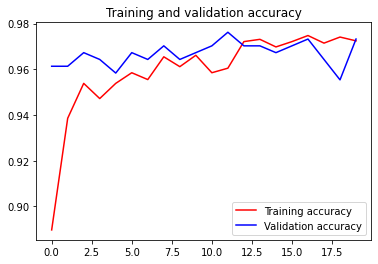

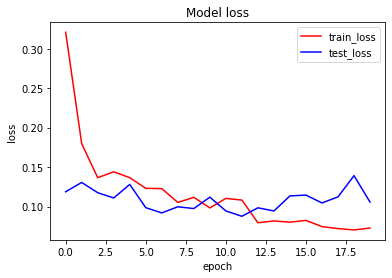

In [77]:
def plot_train_history(history):
    # Summarize history for accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.plot(epochs,loss, 'r', label='train_loss')
    plt.plot(epochs,val_loss, 'b', label='test_loss')
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc=0)
    plt.show()


plot_train_history(history)

In [69]:
model.save('modelBiasa1.h5')

In [109]:
model_json = model.to_json()
with open("model_tf_learning_fix.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("weight_tf_learning_fix.h5")
print("Saved model to disk")

Saved model to disk


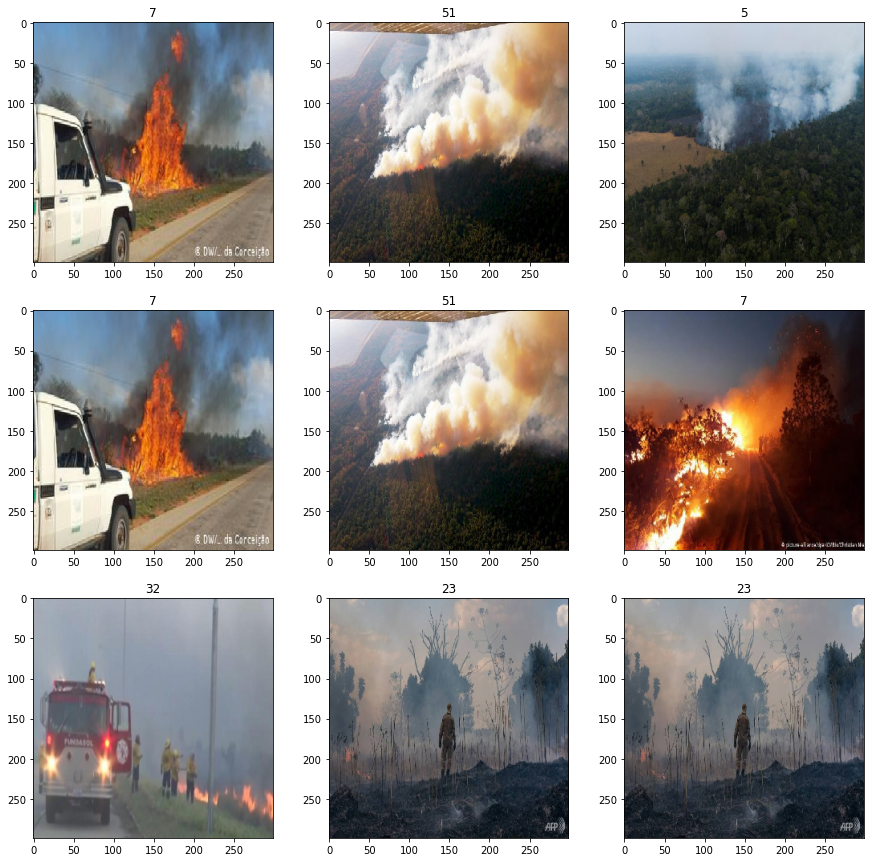

In [15]:
# import numpy as np
# label_names = {0: 'cyclone', 1: 'earthquake', 2: 'flood', 3: 'wildfire'}
# def run_prediction():
#     n = 331
#     plt.figure(figsize=(15, 15))
#     for i in range(9):
#         plt.subplot(n)
#         idx = random.randint(0, len(testing_generator)-1)
#         predict = model.predict(testing_generator[idx][0])
#         plt.imshow(testing_generator[idx][0][0])
#         plt.title(np.argmax(predict))
#         n += 1
# run_prediction()

In [8]:
# load and evaluate a saved model
from keras.models import load_model

# load model
model = load_model('model.h5')

In [32]:
# new_model= tf.keras.models.load_model(model)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with open("model_tfliteCoba.tflite", 'wb') as f:
  f.write(tflite_model)
  print("Saved model to disk")

INFO:tensorflow:Assets written to: C:\Users\CBR\AppData\Local\Temp\tmpnh_md2v3\assets
Saved model to disk


(224, 224, 3)
(1, 224, 224, 3)
Banjir
0.98242676


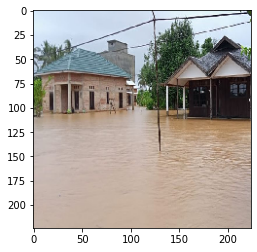

In [67]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt


path = './banjir1.jpeg'
#load image make the size into the target size from training gen
img = image.load_img(path, target_size=(224, 224))
#convert image to array and rescale it to 1./255
x = image.img_to_array(img)/255
print(x.shape)

#change shape of the image
x = np.expand_dims(x, axis=0)
print(x.shape)

# prediksi model
classes = model.predict(x,batch_size=10)
# check the array of classes to determine which array the result of prediction
prediction = np.where(classes==np.max(classes))
# checking from the 2 dimesion array from prediction and find the max probability 
persentase = str(np.max(classes))

label_names = ["Gempa Bumi", "Banjir", "Tanah Longsor", "Kebakaran Hutan"]
prediction_name = label_names[np.argmax(classes[0])]

print(prediction_name)
print(persentase)

# if run from local can use this
# prediksi_indices=train_generator.class_indices
# prediksi = np.argmax(classes) 
# for key, value in prediksi_indices.items():
#     if value==prediksi:
#       print(key)

plt.imshow(img)
# print(classes)